# Overfitting and Underfitting


In [18]:
#import paskages
import pandas as pd
from IPython.display import display

import keras
from keras import layers , callbacks
from tensorflow.keras.callbacks import EarlyStopping

You can increase the capacity of a network either by making it wider (more units to existing layers) or by making it deeper (adding more layers). 

Wider networks have an easier time learning more linear relationships,

 while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

### Adding Early Stopping

In Keras, we include early stopping in our training through a callback. A callback is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has a variety of useful callbacks pre-defined, but you can define your own, too.)

In [10]:
early_stopping = EarlyStopping(
        min_delta=0.001 ,   #minimium amount of change to count as an improvement
    patience=20  ,#how many epochs to wait before stopping
        restore_best_weights=True
        )

These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.

Let's continue developing the model from the example in the last tutorial. We'll increase the capacity of that network but also add an early-stopping callback to prevent overfitting.



In [12]:
#load data
red_wine = pd.read_csv("data/red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

In [16]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [17]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [19]:
early_stopping = callbacks.EarlyStopping(
min_delta=0.001 ,
patience=20,
restore_best_weights=True)

In [20]:
#model Sequential
model= keras.Sequential([
    layers.Dense(512 , activation="relu", input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512 , activation='relu'),
    layers.Dense(1)
])

In [21]:
#compile model 
model.compile(
    optimizer='adam',
    loss="mae"
             )

Choose a large number of epochs when using early stopping, more than you'll need.

In [25]:
history = model.fit(
            X_train,
            y_train,
            validation_data=(X_valid , y_valid),
            batch_size=256,
            epochs=500,
            callbacks=[early_stopping],
            verbose=0
                )

Minimum validation loss: 0.09276188164949417


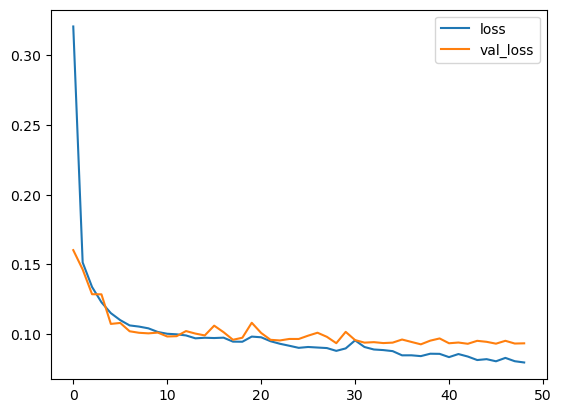

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))